# Analiza podatkov o vinih
V tej datoteki analiziram podatke o vinih.

## Predpriprava
Najprej naložimo knjižnico pandas in datoteki .csv.
Podatkov je veliko, zato bomo njihov prikaz s tabelami omejili.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
vina = pd.read_csv('vina.csv', index_col = 'id')
pd.options.display.max_rows = 30

Najprej si poglejmo nekaj podatkov o vinih.

In [2]:
vina.head(n=10)

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier
id,,,,,,,,,
277308,Alpha Omega 2013 Stagecoach Vineyard Cabernet ...,99,"Dark and vibrant in color, this is a stellar, ...",225.0,US,14.5,750 ml,Red,Virginie Boone
279510,Alpha Omega 2013 Beckstoffer Las Piedras Caber...,98,This is a bright concentrated wine that's velv...,225.0,US,14.4,750 ml,Red,Virginie Boone
278957,Alpha Omega 2013 Proprietary Red (Napa Valley),98,"This blends 61% Cabernet Sauvignon, 32% Merlot...",98.0,US,14.5,750 ml,Red,Virginie Boone
277484,Hall 2014 Rainin Vineyard Cabernet Sauvignon (...,98,From the iconic site atop the mighty mountain ...,325.0,US,15.6,750 ml,Red,Virginie Boone
279508,Alpha Omega 2013 Beckstoffer Missouri Hopper C...,98,"Luxurious in brick, clove and a wealth of blac...",225.0,US,14.6,750 ml,Red,Virginie Boone
279176,Château Pichon Longueville 2015 Pauillac,98,This is one of the great successes of this vin...,137.0,France,13.5,750 ml,Red,Roger Voss
278730,Louis Jadot 2015 Clos de la Roche,98,This grand vineyard is one of the jewels of Mo...,330.0,France,13.5,750 ml,Red,Roger Voss
279167,Château Léoville Barton 2015 Saint-Julien,97,"Rich, generous and elegant, this is a very den...",NaN,France,13.0,750 ml,Red,Roger Voss
278725,Louis Jadot 2015 Chapelle-Chambertin,97,"Produced from vines owned by Louis Jadot, this...",240.0,France,13.5,750 ml,Red,Roger Voss


## Analiza
Za začetek si oglejmo, katere kategorije vin sploh imamo in kako so razporejene.

In [3]:
vina_po_kategorijah = vina.groupby('category')

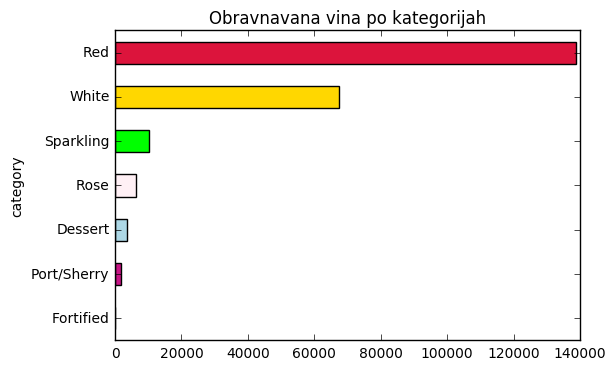

In [4]:
vina_po_kategorijah.size().sort_values().plot.barh(title='Obravnavana vina po kategorijah', 
                                                   stacked=True, x='število vin', 
                                                   color=['black', 'mediumvioletred', 'lightblue', 
                                                          'lavenderblush', 'lime', 'gold', 'crimson'])

Iz zgornjega grafa vidimo, da je največ zajetih vin rdečih, skoraj polovico manj je belih. Penečih vin je približno šestkrat manj kot belih. Ostalih vin (Rose, desertna, zdravilna) je v primerjavi z rdečimi zanemarljivo malo.
Točne številke si lahko ogledamo v spodnji tabeli.

In [5]:
vina_po_kategorijah['title'].count().sort_values(ascending=False)

category
Red            138797
White           67539
Sparkling       10203
Rose             6449
Dessert          3660
Port/Sherry      1737
Fortified         118
Name: title, dtype: int64

Poglejmo si še, kakšne so povprečne vrednosti glede na kategorijo.

In [6]:
vina_po_kategorijah.mean().sort_values(by='price', ascending=False)

,points,price,alcohol
category,,,
Port/Sherry,89.192286,53.729334,19.252684
Fortified,89.491525,49.000000,17.188696
Dessert,89.665027,47.760607,12.324687
Sparkling,88.140547,40.535412,12.057330
Red,88.331412,38.067086,14.069436
White,87.680925,24.654345,13.162324
Rose,86.398977,17.287465,12.939917


Opazimo, da najvišjo in najnižjo povprečno ceno dosegajo vina tistih kategorij, za katere imamo najmanjšo bazo podatkov, zato o tej povezavi ne bomo delali hipotez. Vidimo pa, da so rdeča vina za približno 1,5-krat dražja od belih.
Dejstvo: Bela vina imajo v povprečju vsebnost alkohola med 5 in 14%, rdeča pa med 12 in 15%, zatorej so izračunani podatki precej točni.

Zanimivo je, da je tudi stolpec povprečne vsebnosti alkohola približno padajoč, čeprav smo urejali padajoče po ceni. Opazimo odstopanje pri rdečih in belih vinih, vendar nas zagotovo zanima korelacija med ceno in vsebnostjo alkohola.

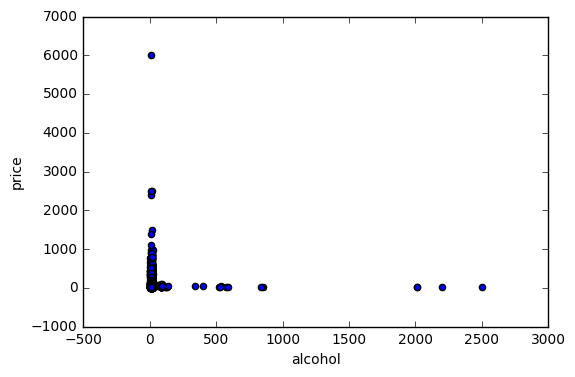

In [7]:
vina.plot.scatter('alcohol', 'price')

Opazimo nekaj nenavadnega: vsebnost alkohola je pri nekaterih vinih višja celo od 100%! Da so cene nekaterih vin visoke, je bilo pričakovati. Preden nadaljujemo z analizo korelacije med vsebnostjo alkohola in ceno, si poglejmo ekstreme.

In [8]:
vina[(vina['alcohol'] > 50.0) | (vina['price'] > 2000)].sort_values(by='alcohol', ascending=False).head(n=60)

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier
id,,,,,,,,,
86668,Agricoltori del Chianti Geografico 2005 Riserv...,90,There's great personality here thanks to the w...,NaN,Italy,3000.0,750 ml,Red,NaN
55812,Vallformosa 1999 Masia Freyes Collección Espec...,81,"Rusty in color, with nutty, leathery aromas th...",30.0,Spain,2500.0,750 ml,Red,Michael Schachner
74917,J Vineyards & Winery 2005 Chardonnay (Russian ...,89,Captures the essence of Russian River Chard wi...,32.0,US,2200.0,750 ml,White,NaN
244503,Artesa 2015 Albariño (Carneros),90,Jasmine and orange blossom dot the nose of thi...,28.0,US,2015.0,750 ml,White,Virginie Boone
222154,Mont Marçal 2011 Brut Reserva Sparkling (Cava),87,Popcorn and apple aromas ride highest on a lig...,14.0,Spain,2011.0,750 ml,Sparkling,Michael Schachner
263118,Château la Dominique 2014 Relais de la Dominiq...,90,The second wine of La Dominique on the Saint-E...,NaN,France,1305.0,750 ml,Red,Roger Voss
268628,Shooting Star 2014 Aligoté (Washington),87,Aromas of corn on the cob and spice lead to li...,14.0,US,850.0,750 ml,White,Sean P. Sullivan
113390,Esterlina 2008 Cole Ranch Riesling (Cole Ranch),87,From a producer with a generally good track re...,19.0,US,839.0,750 ml,White,NaN
113391,Esterlina 2008 Dry Riesling (Cole Ranch),83,"Bone dry, as the label suggests, to the wine's...",19.0,US,586.0,750 ml,White,NaN


Vin, dražjih od 2000 $ ali z vsebnostjo alkohola nad 50%, je 51. Nekaj napak je očitnih, npr. vsebnost alkohola 2015%
pri vinu, ki je bilo proizvedeno tega leta.
Poglejmo si še histogram števila vin v odvisnosti od vsebnosti alkohola.
Vina imajo običajno vsebnost alkohola med 4 in 25%, zato bomo za relavantne podatke vzeli tista vina, katerih vsebnost alkohola je manjša od 30%.

Poglejmo najprej, kakšen je delež vin, ki ustrezajo kriteriju vsebnosti alkohola pod 30%.

In [9]:
(vina[vina['alcohol'] < 30].count() / vina['alcohol'].count()).alcohol

0.99973577128362312

Vidimo, da če zanemarimo vina, ki imajo navedeno previsoko vsebnost alkohola, zajamemo 99,97% vin, ki imajo podatek o vsebnosti alkohola. Ko bomo obravnavali karkoli v odvisnosti od alkohola, moramo biti pozorni, da odstopanj ne vključimo v analizo, saj so posledica napak na spletni strani, s katere smo zajeli podatke.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000086445F8>]], dtype=object)

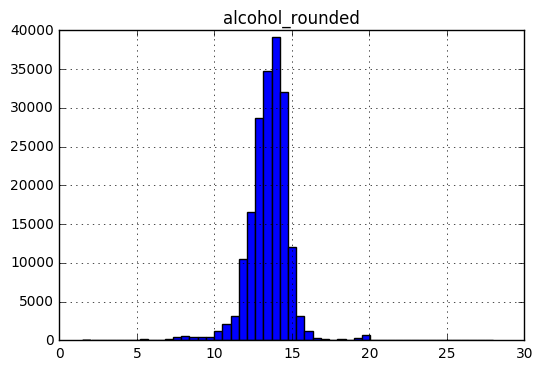

In [10]:
vina['alcohol_rounded'] = (vina['alcohol'] * 2).round() / 2
vina[vina['alcohol'] <= 30].hist(column='alcohol_rounded', bins=50)

Večina vin ima vsebnost alkohola med 10 in 16 %, tako kot smo pričakovali.

Nadaljujmo z analiziranjem povezave med ceno in vsebnostjo alkohola.

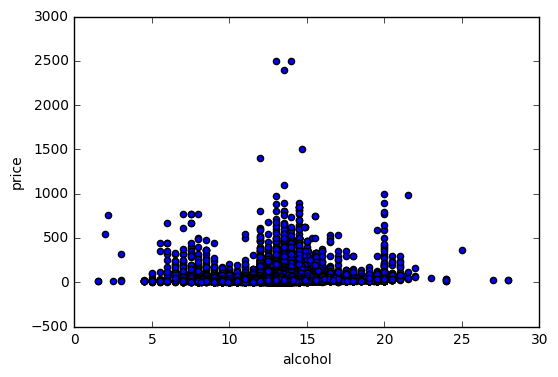

In [11]:
vina[(vina['alcohol'] < 30) & (vina['price']<3000)].plot.scatter('alcohol', 'price')

Iz danega grafa razberemo, da cena in vsebnost alkohola nista povezana, ima pa največ vin ceno do približno 250 $.

Oglejmo si še nekaj najdražjih vin.

In [12]:
vina.sort_values(by='price', ascending=False).head(n=15)

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier,alcohol_rounded
id,,,,,,,,,,
82257,Château Pétrus 2005 Pomerol,100,"As so often, Pétrus has the ability to charm a...",6000.0,France,13.5,750 ml,Red,Roger Voss,13.5
257319,Château Pétrus 2014 Pomerol,96,The wine is a velvet glove in an iron fist. Th...,2500.0,France,14.0,750 ml,Red,Roger Voss,14.0
173722,Domaine du Comte Liger-Belair 2010 La Romanée,96,"A superb wine from a great year, this is power...",2500.0,France,13.0,750 ml,Red,Roger Voss,13.0
230446,Château Pétrus 2013 Pomerol,95,"This wine is ripe, juicy and already showing i...",2400.0,France,13.5,750 ml,Red,Roger Voss,13.5
143342,Château Latour 2009 Pauillac,99,"A big, powerful wine that sums up the richness...",2300.0,France,NaN,750 ml,Red,Roger Voss,NaN
189782,Château Pétrus 2011 Pomerol,97,This extravagantly perfumed wine has great jui...,2000.0,France,NaN,750 ml,Red,Roger Voss,NaN
81963,Château Latour 2005 Pauillac,100,"A great wine, the summation of a great vintage...",2000.0,France,NaN,750 ml,Red,Roger Voss,NaN
91878,Domaine du Comte Liger-Belair 2005 La Romanée,96,"A wonderfully complete wine, with all the elem...",2000.0,France,NaN,750 ml,Red,Roger Voss,NaN
143340,Château Margaux 2009 Margaux,98,"A massive wine for Margaux, packed with tannin...",1900.0,France,NaN,750 ml,Red,Roger Voss,NaN


Opazimo, da so najdražja vina francoska. Pričakovano imajo najdražja vina tudi oceno blizu ali enako 100. Vidimo tudi, da kar nekaj najdražjih vin nima podatkov o vsebnosti alkohola, torej jih pri prejšnji analizi nismo mogli upoštevati. Poglejmo si, kakšna je porazdelitev vin glede na ceno in državo.

In [13]:
vina_po_drzavah = vina[(vina['alcohol'] < 30)|(vina['alcohol'].isnull())].groupby('country')
vina_po_drzavah.size().sort_values(ascending=False).head(n=23)

country
US              97636
France          36318
Italy           31718
Spain           11833
Portugal         8699
Chile            7961
Australia        7608
Argentina        7181
Austria          4874
Germany          3959
South Africa     3438
New Zealand      3414
Greece            918
Israel            749
Canada            350
Hungary           247
Uruguay           194
Bulgaria          179
Romania           165
Croatia           115
Georgia           106
Turkey            104
Slovenia           98
dtype: int64

In [14]:
vina_po_drzavah.size().sort_values(ascending=True).head(n=15)

country
Montenegro                 1
Bosnia and Herzegovina     1
Slovakia                   1
Japan                      2
Tunisia                    3
Egypt                      3
South Korea                3
Lithuania                  4
Kosovo                     6
Armenia                    6
Luxembourg                 7
China                      8
Serbia                    10
India                     10
Switzerland               11
dtype: int64

Največ vin iz baze je zaradi ameriške strani, s katere smo zajeli podatke, pričakovano ameriških. 1000-krat manj vin je slovenskih. Ker je vin iz Amerike v primerjavi z ostalimi precej, je grafični prikaz za države z zajetimi manj kot 4000 vini nepregleden. Prikazane so tudi države, iz katerih smo zajeli malo vin. Če se pojavijo v statistiki, ne smemo prehitro zaključiti z analizo.

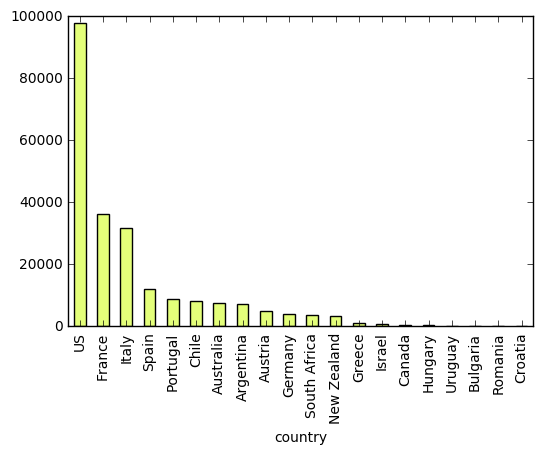

In [15]:
vina_po_drzavah['country'].count().sort_values(ascending=False)[:20].plot.bar(colormap='Wistia')

Kakšne so povprečne cene vin glede na državo? Od kod prihajajo najdražja vina?

In [16]:
vina_po_drzavah['country'].count().sort_values(ascending=False)[:35].index

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Australia',
       'Argentina', 'Austria', 'Germany', 'South Africa', 'New Zealand',
       'Greece', 'Israel', 'Canada', 'Hungary', 'Uruguay', 'Bulgaria',
       'Romania', 'Croatia', 'Georgia', 'Turkey', 'Slovenia', 'Moldova',
       'Mexico', 'Brazil', 'England', 'Lebanon', 'Morocco', 'Peru', 'Ukraine',
       'Cyprus', 'Macedonia', 'Czech Republic', 'Switzerland'],
      dtype='object', name='country')

In [17]:
vina_po_drzavah.mean().sort_values(by='price', ascending=False)[:20]

,points,price,alcohol,alcohol_rounded
country,,,,
Switzerland,88.636364,64.181818,12.790909,12.772727
England,91.605263,50.455882,12.033784,12.033784
China,84.625000,45.875000,12.425000,12.437500
France,88.896222,43.607322,12.938551,12.938821
Hungary,88.591093,41.963115,12.316872,12.316872
Italy,88.382590,38.360675,13.378709,13.378903
Germany,89.072746,37.527344,10.183602,10.183492
Canada,88.928571,37.152299,12.471903,12.475831
US,88.108013,34.152463,13.981121,13.985707


Najdražja vina so švicarska, pri čemer moramo vedeti, da je švicarskih vin v naši bazi relativno malo (zgolj 11). Med dražjimi vini se pojavljajo tudi kitajska, ki pa smo jih zajeli manj kot 10.

In [18]:
vina_po_drzavah['country'].count().sort_values(ascending=False).count()

49

Na tej lestvici se Slovenija nahaja na 17. mestu od 49-ih zajetih držav, pri čemer je pri 14-ih baza vin zanemarljivo majhna. V povprečju je cena slovenskih vin povprečna tudi v svetovnem merilu.

Kako pa je s kvaliteto vin? Kje se proizvajajo najboljša vina?
Kvaliteto vina razberemo iz stolpca 'points'. Ker se vina običajno ne ocenjuje po tej 100-stopenjski lestvici, jo bom obrazložila. Poudarimo, da ocene vsaj v tem primeru niso povsem objektvine, pač pa stvar presoje poskuševalcev. Vina, ki dobijo manj kot 80 točk, naj na strani ne bi bila objavljena. Ker vseh podatkov o vinu ne dobimo iz ocene, si za vino, ki nas zanima, preberemo še opis.

Kaj predstavljajo dosežene točke?
- 98 - 100 : vrhunec kakovosti
- 94 - 97 : odlično vino
- 90 - 93 : zelo priporočamo
- 87 - 89 : zelo dobro
- 83 - 86 : primerno za vsakodnevno uživanje, dobro
- 80 - 82 : sprejemljivo

Razvrstimo države po povprečju doseženih točk.

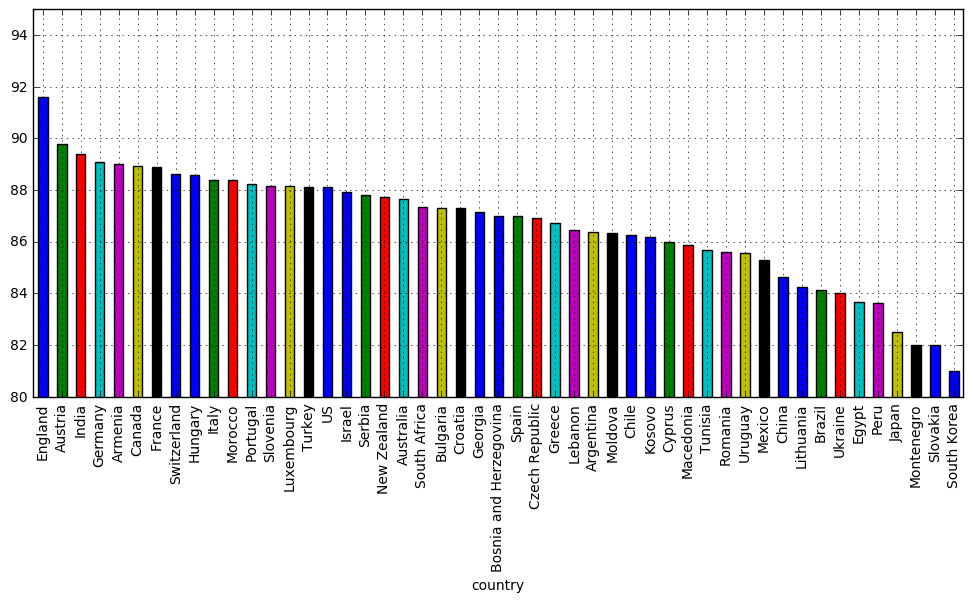

In [19]:
vina_po_drzavah.mean()['points'].sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), ylim=(80,95), grid=True)

Če želimo pogledati natančne številke, pogledamo še spodnji tabeli. Že iz grafa vidimo, da so slovenska vina v povprečju dobra in se uvrščajo v boljšo polovico. Najboljša vina pa so angleška (v bazi jih je sicer manj kot slovenskih, pa vseeno več kot 10), avstrijska in nemška. Indijskih vin je v bazi zgolj 10, zato sem ta vina pri naštevanju izpustila.

In [20]:
vina_po_drzavah.mean().sort_values(by='points', ascending=False)[:15]

,points,price,alcohol,alcohol_rounded
country,,,,
England,91.605263,50.455882,12.033784,12.033784
Austria,89.762413,31.923062,12.751399,12.751535
India,89.400000,14.200000,13.200000,13.200000
Germany,89.072746,37.527344,10.183602,10.183492
Armenia,89.000000,17.833333,13.166667,13.166667
Canada,88.928571,37.152299,12.471903,12.475831
France,88.896222,43.607322,12.938551,12.938821
Switzerland,88.636364,64.181818,12.790909,12.772727
Hungary,88.591093,41.963115,12.316872,12.316872


Zanima nas tudi odvisnost cene od kategorije vina. Opazili smo že, da so rdeča vina za približno 1,5-krat dražja od belih. So sicer rdeča vina kaj cenejša od ostalih?

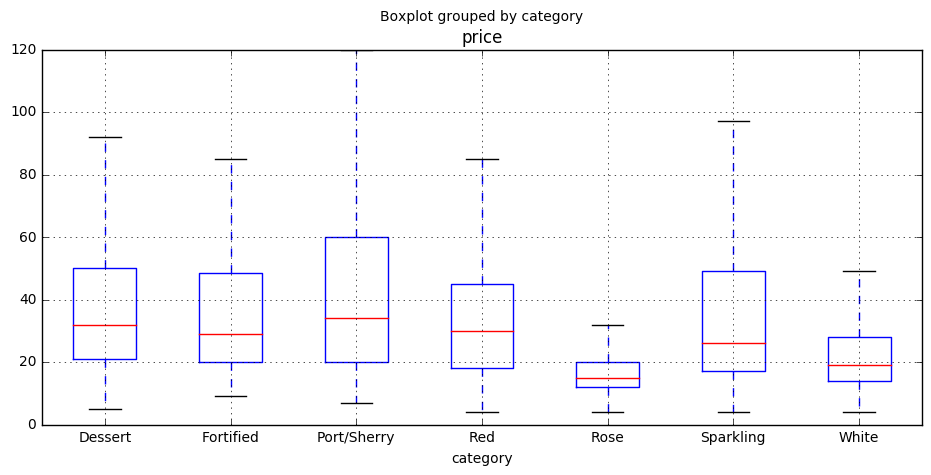

In [21]:
vina[(vina['alcohol'] < 30)|(vina['alcohol'].isnull())
    ].boxplot(by='category', column='price', showfliers=False, figsize=(11,5), grid=True)

Opazimo, da so najcenejša vina Rose: najdražja vina te kategorije komaj dosegajo povprečje cene vin Port, ki sicer spadajo med desertna vina, ampak jih na strani razlikujejo, zatorej jih ločimo tudi mi.


Opazimo tudi, da so bela vina cenejša od ostalih, vse ostale cene pa se v povprečju razlikujejo za do 10 $.

Oglejmo si še povezavo med oceno (točkami) in ceno.

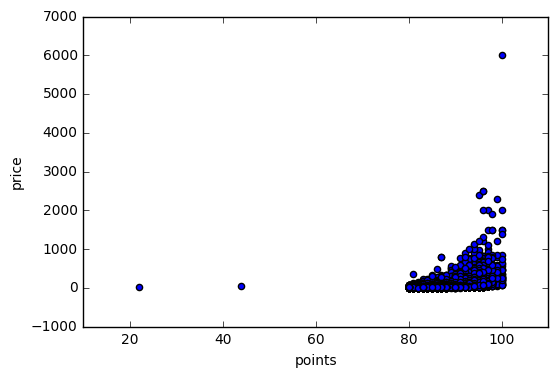

In [22]:
vina.plot.scatter('points', 'price')

Opazimo dve izstopajoči točki, torej dve vini z oceno manj kot 80. Ker stran pravi, da taka vina niso objavljena, preverimo, kaj se dogaja.
Tretja izstopajoča točka je vino s ceno okrog 6000 $ in je ocenjeno s 100 točkami. Izstopa še nekaj točk, ki predstavljajo vina z visokimi ocenami in ceno. Da bo pregled boljši, jih v naslednjem grafu izpustimo.

In [23]:
vina[(vina['points'] < 80)]

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier,alcohol_rounded
id,,,,,,,,,,
226064,City Winery of New York 2012 Reserve Obsidian ...,44,DUPLICATE ENTRY W/ CITY WINERY of CHICAGO - Pr...,38.0,US,14.0,750 ml,Red,Jim Gordon,14.0
213460,Strauss 2014 Classic Chardonnay (Steiermark),22,smells of rot,18.0,Austria,12.0,750 ml,White,Anne Krebiehl MW,12.0


Za eno izmed vin so opazili, da je duplikat, zatorej ga bomo v nadaljni analizi izpustili, čeprav to ne pojasni nizke ocene. Za drugo vino je ocena verjetno prava, saj opis pravi, da smrdi po gnilem. Vino je avstrijsko (verjetno je to vino nižalo povprečje vsem avstrjskim v analizi povprečnih točk po državah), stane pa 18 $, kar je glede na doseženo oceno in opis kar precej.

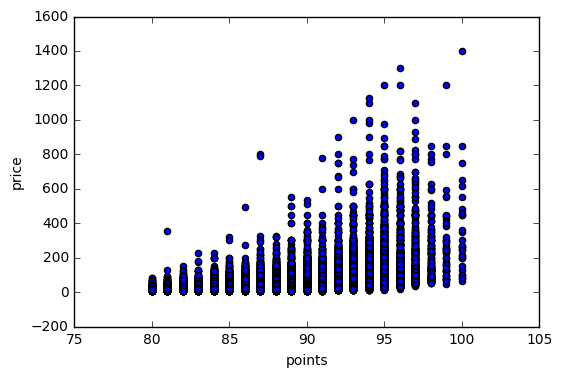

In [24]:
vina[(vina['points'] > 79) & (vina['price'] < 1500)].plot.scatter('points', 'price')

Vidimo, da najnižja cena predvsem pri najboljših vinih z oceno nad 95 narašča. Tudi najvišje cene se z oceno načeloma višajo. Boljši bo prikaz s stolpičnim diagramom po točkah in povprečji cen za posamezne točke.

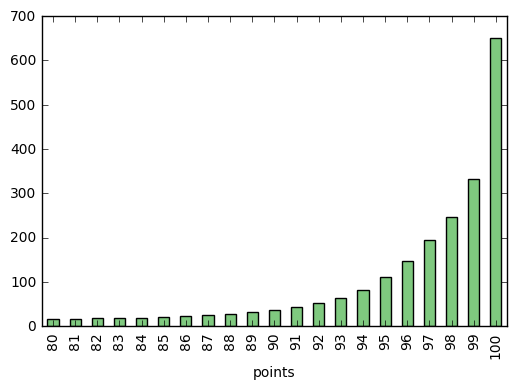

In [25]:
vina_po_točkah = vina[vina['points'] > 79].groupby('points')
vina_po_točkah['price'].mean().plot.bar(colormap='Accent')

Sedaj vidimo, da cena z naraščajočimi točkami eksponentno narašča. Čeprav je povprečna ocena vin z oceno 100 približno 650 $, smo videli, da so tudi ta vina cenovno dostopna in ne dosegajo vsa vrhunska vina tudi ekstremno visokih cen.

Oglejmo si vina z oceno 100.

In [26]:
vina[vina['points'] == 100].sort_values(by='price', ascending=True)

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier,alcohol_rounded
id,,,,,,,,,,
123768,Cayuse 2007 En Chamberlin Vineyard Syrah (Wall...,100,"In a stunning lineup of Cayuse Syrahs, the En ...",65.0,US,NaN,750 ml,Red,Paul Gregutt,NaN
101153,Charles Smith 2006 Royal City Syrah (Columbia ...,100,In 2005 Charles Smith introduced three high-en...,80.0,US,NaN,750 ml,Red,Paul Gregutt,NaN
136614,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,100,Initially a rather subdued Frog; as if it has ...,80.0,US,14.4,750 ml,Red,Paul Gregutt,14.5
107830,Williams Selyem 2007 Litton Estate Vineyard Pi...,100,"A spectacular Pinot Noir, but a very young one...",100.0,US,14.1,750 ml,Red,NaN,14.0
196602,Paolo Scavino 2010 Bric dël Fiasc (Barolo),100,"If a wine can truly be perfect, this is it. Di...",100.0,Italy,14.5,750 ml,Red,Kerin O’Keefe,14.5
196594,Giuseppe Rinaldi 2010 Brunate (Barolo),100,The 2010 Brunate is one of the greatest expres...,126.0,Italy,NaN,750 ml,Red,Kerin O’Keefe,NaN
164375,Château Léoville Barton 2010 Saint-Julien,100,"This is a magnificently solid wine, initially ...",150.0,France,13.5,750 ml,Red,Roger Voss,13.5
166958,Giovanni Chiappini 2009 Guado de' Gemoli (Bol...,100,"This small, family-run estate in the heart of ...",195.0,Italy,15.0,750 ml,Red,NaN,15.0
108992,Cardinale 2006 Cabernet Sauvignon (Napa Valley),100,Tasted in a flight of great and famous Napa wi...,200.0,US,NaN,750 ml,Red,NaN,NaN


In [27]:
vina[(vina['points'] == 100) & (vina['price'] <= 200)].sort_values(by='price', ascending=True)

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier,alcohol_rounded
id,,,,,,,,,,
123768,Cayuse 2007 En Chamberlin Vineyard Syrah (Wall...,100,"In a stunning lineup of Cayuse Syrahs, the En ...",65.0,US,NaN,750 ml,Red,Paul Gregutt,NaN
136614,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,100,Initially a rather subdued Frog; as if it has ...,80.0,US,14.4,750 ml,Red,Paul Gregutt,14.5
101153,Charles Smith 2006 Royal City Syrah (Columbia ...,100,In 2005 Charles Smith introduced three high-en...,80.0,US,NaN,750 ml,Red,Paul Gregutt,NaN
196602,Paolo Scavino 2010 Bric dël Fiasc (Barolo),100,"If a wine can truly be perfect, this is it. Di...",100.0,Italy,14.5,750 ml,Red,Kerin O’Keefe,14.5
107830,Williams Selyem 2007 Litton Estate Vineyard Pi...,100,"A spectacular Pinot Noir, but a very young one...",100.0,US,14.1,750 ml,Red,NaN,14.0
196594,Giuseppe Rinaldi 2010 Brunate (Barolo),100,The 2010 Brunate is one of the greatest expres...,126.0,Italy,NaN,750 ml,Red,Kerin O’Keefe,NaN
164375,Château Léoville Barton 2010 Saint-Julien,100,"This is a magnificently solid wine, initially ...",150.0,France,13.5,750 ml,Red,Roger Voss,13.5
166958,Giovanni Chiappini 2009 Guado de' Gemoli (Bol...,100,"This small, family-run estate in the heart of ...",195.0,Italy,15.0,750 ml,Red,NaN,15.0
108992,Cardinale 2006 Cabernet Sauvignon (Napa Valley),100,Tasted in a flight of great and famous Napa wi...,200.0,US,NaN,750 ml,Red,NaN,NaN


Najcenejša med najboljšimi so rdeča vina, čeprav smo prej ugotovili, da so v povprečju rdeča vina dražja od npr. belih (med vini z oceno 100 je sicer le eno belo vino). Najcenejše najboljše vino stane 65 $, kar je preračunano v našo valuto 53 € za 750 mililitrsko steklenico rdečega vina. Poglejmo si še njegov opis.

In [28]:
vina.iloc[123768]['wine_description']

"If there's any oak at all on this wine, it takes a very shy role in the background. The stars are ripe citrus and pear fruit, crisp acidity and a limestoney minerality. The finish is honey sweet."

Ker opisa ne znam prevesti dovolj poetično, ga raje ne prevajam.

V zgornji analizi smo obravnavi ceno, vendar je nismo preračunali na količino. Zanimivo bi bilo vedeti, v kakšni steklenici so običajno ustekleničena vina in če so vsaj v 95% v steklenicah z enakim volumnom, lahko zgornje podatke uporabimo za relavantne.

In [29]:
vina_po_steklenicah = vina.groupby('bottle_size')
vina_po_steklenicah.size().sort_values().head(n=25)

bottle_size
620 ml          1
250 ml          3
200 ml         11
187 ml         17
1000 ml        94
1500 ml       125
3000 ml       175
500 ml        820
375 ml       2022
750 ml     225235
dtype: int64

Večina vin (98,6 %) je ustekleničena po 3/4 litra, 100-krat manj jih je ustekleničenih po 3/8 litra. Presenetljivo malo jih je ustekleničenih po 1 L. Ker so skoraj vsa vina ustekleničena enako, so podatki izračunani zgoraj in povezani s ceno relavantni.

Preglejmo še poskuševalce.

In [30]:
vina_po_poskuševalcih = vina.groupby('sommelier')
vina_po_poskuševalcih.size().sort_values(ascending=True)

sommelier
Fiona Adams              27
Carrie Dykes            145
Christina Pickard       398
Alexander Peartree      437
Jeff Jenssen            535
Mike DeSimone           565
Susan Kostrzewa        2490
Lauren Buzzeo          2738
Anne Krebiehl MW       3698
Jim Gordon             4528
Anna Lee C. Iijima     5318
Sean P. Sullivan       5406
Matt Kettmann          6947
Virginie Boone        10978
Kerin O’Keefe         12167
Joe Czerwinski        13951
Paul Gregutt          17568
Michael Schachner     28296
Roger Voss            39951
dtype: int64

Najbolj izkušen izmed poskuševalcev, ki delujejo na strani, s katere smo zajeli podatke, je [Roger Voss](http://www.winemag.com/taster/roger-voss/). Vina katerih držav poskuša?

In [31]:
# V tabelo poskuševalci shranimo najdene kombinacije poskuševalca in držav, iz katerih so vina, ki jih je ocenjeval.
poskuševalci = vina.groupby(['sommelier', 'country']).size().reset_index()
poskuševalci[poskuševalci['sommelier'] == 'Roger Voss']

,sommelier,country,0
121,Roger Voss,Australia,3
122,Roger Voss,Austria,2327
123,Roger Voss,Chile,3
124,Roger Voss,France,28893
125,Roger Voss,Germany,117
126,Roger Voss,Greece,1
127,Roger Voss,Hungary,1
128,Roger Voss,Italy,202
129,Roger Voss,Morocco,1
130,Roger Voss,Portugal,8240


Roger Voss, ki je ocenil največ vin, poskuša pretežno francoska in portugalska vina, poskusil je tudi kar nekaj avstrijskih vin.

Kdo pa poskuša in ocenjuje slovenska vina?

In [32]:
poskuševalci[poskuševalci['country'] == 'Slovenia']

,sommelier,country,0
16,Anna Lee C. Iijima,Slovenia,34
53,Jeff Jenssen,Slovenia,63


Kakšno oceno običajno dosodijo poskuševalci? Iz tabele bomo videli, kdo v splošnem poskuša najboljša vina oz. dosodi najboljšo oceno.

In [33]:
vina.groupby('sommelier').mean().sort_values(by='points', ascending=False)[:5]

,points,price,alcohol,alcohol_rounded
sommelier,,,,
Anne Krebiehl MW,90.521092,31.316015,12.858025,12.858134
Matt Kettmann,89.999424,38.479829,14.280252,14.287388
Mike DeSimone,89.159292,29.389493,13.739127,13.743316
Virginie Boone,89.134997,46.013423,14.454053,14.459531
Roger Voss,88.960351,41.419912,13.215009,13.215200


Za konec si poglejmo še nekaj slovenskih vin. Ugotovili smo že, da so slovenska vina v povprečju dobra in ne draga. Povprečno dosegajo 88,2 točke, cena pa znaša 26 $ / buteljko (tj. 21 € / buteljko). Povprečna vsebnost alkohola v slovenskem vinu je 12,9 %.

In [34]:
vina[vina['country'] == 'Slovenia'].sort_values(by='points', ascending=False).head(n=5)

,title,points,wine_description,price,country,alcohol,bottle_size,category,sommelier,alcohol_rounded
id,,,,,,,,,,
160383,Edi Simcic 2006 Duet Lex Red (Goriska Brda),91,Lifted blackberry and cherry aromas meld into ...,75.0,Slovenia,15.0,750 ml,Red,Anna Lee C. Iijima,15.0
165887,Movia 2004 Veliko Red (Brda),91,Notes of mint and thyme add savory tones to br...,50.0,Slovenia,13.0,750 ml,Red,Anna Lee C. Iijima,13.0
186747,Kabaj 2010 Luisa White (Goriska Brda),90,"This Slovenian wine is golden straw colored, w...",30.0,Slovenia,12.5,750 ml,White,Jeff Jenssen,12.5
231651,Ferdinand 2009 Brutus Ribolla Gialla (Goriska ...,90,"Amber gold in the glass, this Ribolla Gialla h...",40.0,Slovenia,13.5,750 ml,White,Jeff Jenssen,13.5
186745,Kabaj 2008 Cuvée Morel Red (Goriska Brda),90,This blend is garnet colored with a hint of eu...,46.0,Slovenia,13.0,750 ml,Red,Jeff Jenssen,13.0


Najboljša slovenska vina so (sodeč po zajetih podatkih) iz Goriških Brd, tako bela kot rdeča.